In [3]:
import os
import sys
sys.path.append("../")
import smoothdoq.binned as bd
import smoothdoq.noise as nm
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")

In [4]:
np.random.seed(198163)

# generate base example
window_size = 100
window_start = 10
n_bins = 150
loc1 = np.array([10])
loc2 = np.array([50])
scale1 = np.array([20])
scale2 = np.array([5])
weights = np.array([0.3, 0.7])

D1 = bd.BinnedNormal(window_size, loc1, scale1)
D2 = bd.BinnedNormal(window_size, loc2, scale2)
D = bd.BinnedMixture([D1, D2], weights)
D = bd.WindowedDistribution(n_bins, D, [window_start])

x = D.sample(size=10000)[0]
dens = D.pdf()[0]

x = x
dens = dens / dens.sum()

plt.figure(figsize=(8, 4))
plt.bar(range(n_bins), x, width=1.1, alpha=0.7)
# plt.plot(range(n_bins), dens, c="red")
plt.title("samples from true distribution")

plt.figure(figsize=(8, 4))
plt.plot(range(n_bins), dens, alpha=0.7, c="blue")
# plt.plot(range(n_bins), dens, c="red")
plt.title("samples from true distribution")

AttributeError: 'Line2D' object has no property 'width'

In [ ]:
N1 = nm.NegBinBackgroundNoise(D, noise_ratio=0.25, disp_coef=0.2)
x = N1.sample(size=10000)[0]
plt.figure(figsize=(8, 4))
plt.bar(range(n_bins), x, width=1.1, alpha=0.7, color="red")
plt.title("negative binomial background")

In [ ]:
N2 = nm.MultiplicativeDispersion(D, sigma=0.5)
x = N2.sample(size=10000)[0]
plt.figure(figsize=(8, 4))
plt.bar(range(n_bins), x, width=1.1, alpha=0.7, color="magenta")
plt.title("multiplicative overdispersion")

In [ ]:
N3 = nm.RoundingNoise(D, stride=4)
x = N3.sample(size=10000)[0]
plt.figure(figsize=(8, 4))
plt.bar(range(n_bins), x, width=1.1, alpha=0.7, color="brown")
plt.title("rounding")

In [ ]:
N4 = nm.MultiplicativeDispersion(D, sigma=0.5)
N4 = nm.RoundingNoise(N4, stride=4)
N4 = nm.NegBinBackgroundNoise(N4, noise_ratio=0.3, disp_coef=0.15)
x = N4.sample(size=10000)[0]
plt.figure(figsize=(8, 4))
plt.bar(range(n_bins), x, width=1.1, alpha=0.7, color="black")
plt.title("combined")

In [ ]:
def quantile(Fz, q):
    i = 0
    while Fz[i] < q:
        i += 1
    return i

In [ ]:
n_bins = 200
D = bd.BinnedExponential(n_bins, np.array([0]), np.array([10.0]))
z = D.sample(10000)[0]
Fz = np.cumsum(z) / z.sum()
medz = quantile(Fz, 0.5)

N1 = nm.NegBinBackgroundNoise(D, noise_ratio=0.5, disp_coef=0.2)
x = N1.sample(size=10000)[0]
Fx = np.cumsum(x) / x.sum()
medx = quantile(Fx, 0.5)

plt.figure(figsize=(8, 4))
plt.axvline(medz, c="blue", label="median")
plt.bar(range(n_bins), z, width=1.1, alpha=0.4, color="blue")
plt.title("clean samples")
plt.show()

plt.figure(figsize=(8, 4))
plt.axvline(medx, c="red", label="noisy median")
plt.axvline(medz, c="blue", label="true median")
plt.bar(range(n_bins), x, width=1.1, alpha=0.4, color="red")
plt.title("negative binomial background")
plt.legend()
plt.show()

In [11]:
def kde(x, bw):
    out = np.zeros(len(x))
    N = x.sum()
    xtilde = np.arange(len(x)).astype(float)
    for xi, n in enumerate(x):
        wt = (n / N)
        d = np.sqrt(bw / np.sqrt(2*np.pi)) * np.exp(-0.5 * (bw * (xi - xtilde))**2)
        out += wt * d
    return out

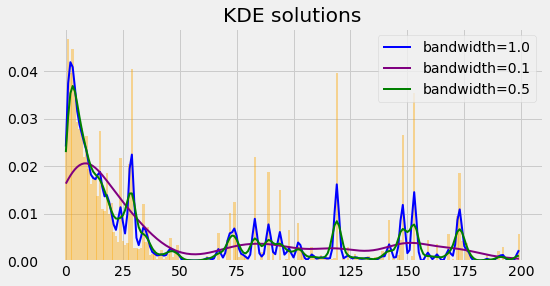

In [12]:
d1 = kde(x, 1.0)
d2 = kde(x, 0.1)
d3 = kde(x, 0.5)
plt.figure(figsize=(8, 4))
plt.plot(d1 / d1.sum(), lw=2.0, label="bandwidth=1.0", c="blue")
plt.plot(d2 / d2.sum(), lw=2.0, label="bandwidth=0.1", c="purple")
plt.plot(d3 / d3.sum(), lw=2.0, label="bandwidth=0.5", c="green")
plt.bar(range(len(x)), x / x.sum(), width=1.1, alpha=0.4, color="orange")
plt.title("KDE solutions")
plt.legend()